
# 🎶 Analyse de la Popularité des Musiques Spotify

Bienvenue dans ce notebook ! Ce document a pour objectif de réaliser une **analyse complète** des paramètres influençant la popularité des musiques et de construire des **modèles prédictifs**.

## 📋 Contenu du Notebook :
1. **Importation des bibliothèques** 📦
2. **Préparation et nettoyage des données** 🧹
3. **Exploration des données (EDA)** 🔍
4. **Construction des modèles (Random Forest et Gradient Boosting)** 🌲🚀
5. **Analyse des erreurs résiduelles** 📊
6. **Segmentation des données et évaluation des modèles** 🧩

Chaque bloc est accompagné de commentaires détaillés pour vous guider tout au long du projet.


Ce bloc est dédié à l'importation des bibliothèques Python nécessaires pour le projet.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

In [ ]:
Spotify_data = pd.read_csv('dataset-spotify.csv')
Spotify_data.head()

In [ ]:
Spotify_data.info()

In [ ]:
Spotify_data[Spotify_data.isnull().any(axis=1)]

In [ ]:
Spotify_data = Spotify_data.drop([65900])

In [ ]:
for col in Spotify_data.columns:
    print(col, ":", Spotify_data[col].nunique())
    

In [ ]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Créer une grille de boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Ajuste selon le nombre de colonnes
axes = axes.flatten()  # Aplatir la grille pour faciliter la boucle

# Boucle pour créer un boxplot pour chaque variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=Spotify_data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_ylabel("Valeur")

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
filtered_data = Spotify_data[
    (Spotify_data['liveness'] > 0.400) & 
    (
        Spotify_data['track_name'].str.contains('vivo|live', case=False, na=False) | 
        Spotify_data['album_name'].str.contains('vivo|live', case=False, na=False)
    )
]

print("Nombre de musiques filtrées :", filtered_data.shape[0])
print(filtered_data[['track_name', 'album_name', 'liveness']])


In [ ]:
#drop la ligne de filtered_data
Spotify_data = Spotify_data.drop(filtered_data.index)


In [ ]:
for col in Spotify_data.columns:
    print(col, ":", Spotify_data[col].nunique())

In [ ]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Créer une grille de boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Ajuste selon le nombre de colonnes
axes = axes.flatten()  # Aplatir la grille pour faciliter la boucle

# Boucle pour créer un boxplot pour chaque variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=Spotify_data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_ylabel("Valeur")

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Nombre de musiques utilisées :", Spotify_data.shape)


#

In [ ]:
#affiche les musiques avec une liveness > 0.4
filtered_data = Spotify_data[Spotify_data['liveness'] > 0.4]
filtered_data

In [ ]:
# Sélectionner les colonnes numériques
numerical_columns = Spotify_data.select_dtypes(include=['float64', 'int64']).columns

# Créer une grille de subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

axes = axes.flatten()  # Aplatir la grille pour une boucle

# Créer un histogramme + KDE pour chaque colonne
for i, col in enumerate(numerical_columns):
    sns.histplot(Spotify_data[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)

# Supprimer les subplots vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#affiche les musiques acec une instrumentalness > 0.8
filtered_data = Spotify_data[Spotify_data['instrumentalness'] > 0.8]
filtered_data

In [ ]:
# Sélectionner les colonnes numériques
numerical_columns = Spotify_data.select_dtypes(include=['float64', 'int64']).columns

# Taille de la grille
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(18, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

# Boucle pour créer un histogramme + KDE pour chaque variable
for i, col in enumerate(numerical_columns):
    sns.histplot(Spotify_data[col], bins=50, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")
    axes[i].axvline(Spotify_data[col].mean(), color='red', linestyle='dashed', linewidth=1, label="Moyenne")
    axes[i].axvline(Spotify_data[col].median(), color='green', linestyle='dashed', linewidth=1, label="Médiane")
    axes[i].legend()

# Supprimer les axes vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
sns.boxplot(x=Spotify_data['liveness'] > 0.4, y=Spotify_data['popularity'])
plt.title("Comparaison de la Popularité selon la Liveness")
plt.xlabel("Liveness > 0.4 (Live)")
plt.ylabel("Popularité")
plt.show()

In [ ]:
outliers = Spotify_data[(Spotify_data['liveness'] > 0.4) & (Spotify_data['popularity'] > 80)]
print(outliers[['track_name', 'album_name', 'artists', 'popularity', 'liveness']])


In [ ]:
top_genres = Spotify_data['track_genre'].value_counts().head(15).index
filtered_data = Spotify_data[Spotify_data['track_genre'].isin(top_genres)]

g = sns.catplot(data=filtered_data, x='track_genre', y='popularity', kind='box', height=6, aspect=2)
g.set_xticklabels(rotation=45, ha="right")
plt.title("Popularité des musiques live pour les principaux genres")
plt.tight_layout()
plt.show()


In [ ]:
# Ajouter une colonne pour différencier les musiques live et studio
Spotify_data['is_live'] = Spotify_data['liveness'] > 0.4

# Sélectionner les genres les plus représentés pour éviter un graphique illisible
top_genres = Spotify_data['track_genre'].value_counts().head(10).index
filtered_data = Spotify_data[Spotify_data['track_genre'].isin(top_genres)]

# Visualisation : comparaison par genre et type (live/studio)
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='track_genre',
    y='popularity',
    hue='is_live',  # Distinction entre live et studio
    data=filtered_data
)

plt.title("Comparaison de la popularité des genres : Live vs Studio")
plt.xlabel("Genre musical")
plt.ylabel("Popularité")
plt.xticks(rotation=45)
plt.legend(title="Type", labels=["Studio", "Live"])
plt.tight_layout()
plt.show()


In [ ]:
# Sélectionner les colonnes numériques uniquement
numerical_columns = Spotify_data.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_columns.corr()

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap des corrélations entre les variables")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 1. Sélection des colonnes pertinentes
Spotify_data_clean = Spotify_data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'], errors='ignore')

# 2. Conversion des colonnes booléennes en 0 et 1
Spotify_data_clean['explicit'] = Spotify_data_clean['explicit'].astype(int)
Spotify_data_clean['is_live'] = Spotify_data_clean['is_live'].astype(int)

# 3. Définir les features et la target
features = Spotify_data_clean.drop(columns=['popularity'])
target = Spotify_data_clean['popularity']

# 4. Gestion des valeurs manquantes
features = features.fillna(features.median())

# 5. Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 6. Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Prédiction et évaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle :")
print(f"RMSE (Erreur quadratique moyenne) : {rmse:.2f}")
print(f"R² (Score de prédiction) : {r2:.2f}")

# 8. Importance des variables
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisation de l'importance des variables
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature',
    data=feature_importance_df, 
    palette="viridis", 
    hue=None
)
plt.title("Importance des variables dans la prédiction de la popularité")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Préparation des données
# On copie le dataset pour le garder intact
Spotify_data_clean = Spotify_data.copy()

# One-Hot Encoding pour 'track_genre'
Spotify_data_clean = pd.get_dummies(Spotify_data_clean, columns=['track_genre'], drop_first=True)

# Conversion des colonnes booléennes en 0/1
Spotify_data_clean['explicit'] = Spotify_data_clean['explicit'].astype(int)
Spotify_data_clean['is_live'] = Spotify_data_clean['is_live'].astype(int)

# Sélection des features et de la target
features = Spotify_data_clean.drop(columns=['popularity', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], errors='ignore')
target = Spotify_data_clean['popularity']

# Gestion des valeurs manquantes
features = features.fillna(features.median())

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 3. Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# 4. Évaluation du modèle
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle optimisé :")
print(f"RMSE (Erreur quadratique moyenne) : {rmse:.2f}")
print(f"R² (Score de prédiction) : {r2:.2f}")

# 5. Importance des variables
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisation de l'importance des variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")
plt.title("Importance des variables dans le modèle optimisé")
plt.show()


In [ ]:
# Création de nouvelles variables combinées
Spotify_data_clean['acousticness_valence'] = Spotify_data_clean['acousticness'] * Spotify_data_clean['valence']
Spotify_data_clean['dance_energy'] = Spotify_data_clean['danceability'] * Spotify_data_clean['energy']

# Création de catégories pour duration_ms
Spotify_data_clean['duration_bins'] = pd.cut(
    Spotify_data_clean['duration_ms'], 
    bins=[0, 180000, 240000, 300000, 600000], 
    labels=['court', 'moyen', 'long', 'très_long']
)

# Encodage One-Hot pour 'duration_bins'
Spotify_data_clean = pd.get_dummies(Spotify_data_clean, columns=['duration_bins'], drop_first=True)

# Vérification des nouvelles colonnes
print(Spotify_data_clean.head())


In [ ]:
print(Spotify_data_clean.columns)

In [152]:
# Création de la fonction pour regrouper les genres
def group_genres(row):
    if row.filter(like='pop').sum() > 0: return 'pop'
    elif row.filter(like='rock').sum() > 0: return 'rock'
    elif row.filter(like='hip-hop').sum() > 0 or row.filter(like='rap').sum() > 0: return 'hip-hop/rap'
    elif row.filter(like='classical').sum() > 0: return 'classical'
    elif row.filter(like='electro').sum() > 0 or row.filter(like='techno').sum() > 0: return 'electronic'
    elif row.filter(like='jazz').sum() > 0: return 'jazz'
    elif row.filter(like='latin').sum() > 0: return 'latin'
    elif row.filter(like='house').sum() > 0: return 'house'
    else: return 'other'

# Appliquer la fonction sur les colonnes track_genre_*
Spotify_data_clean['genre_simplified'] = Spotify_data_clean.apply(group_genres, axis=1)

# Supprimer les colonnes encodées individuelles des genres
Spotify_data_clean = Spotify_data_clean.drop(columns=Spotify_data_clean.filter(like='track_genre_').columns)

# Encodage One-Hot pour 'genre_simplified'
Spotify_data_clean = pd.get_dummies(Spotify_data_clean, columns=['genre_simplified'], drop_first=True)

# Vérification
print(Spotify_data_clean.head())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666         0   
1            Ghost - Acoustic          55       149610         0   
2              To Begin Again          57       210826         0   


Performance du modèle après simplification des genres et nouvelles variables :
RMSE : 14.97
R² : 0.56


C:\Users\kheir\AppData\Local\Temp\ipykernel_16312\2143739012.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")


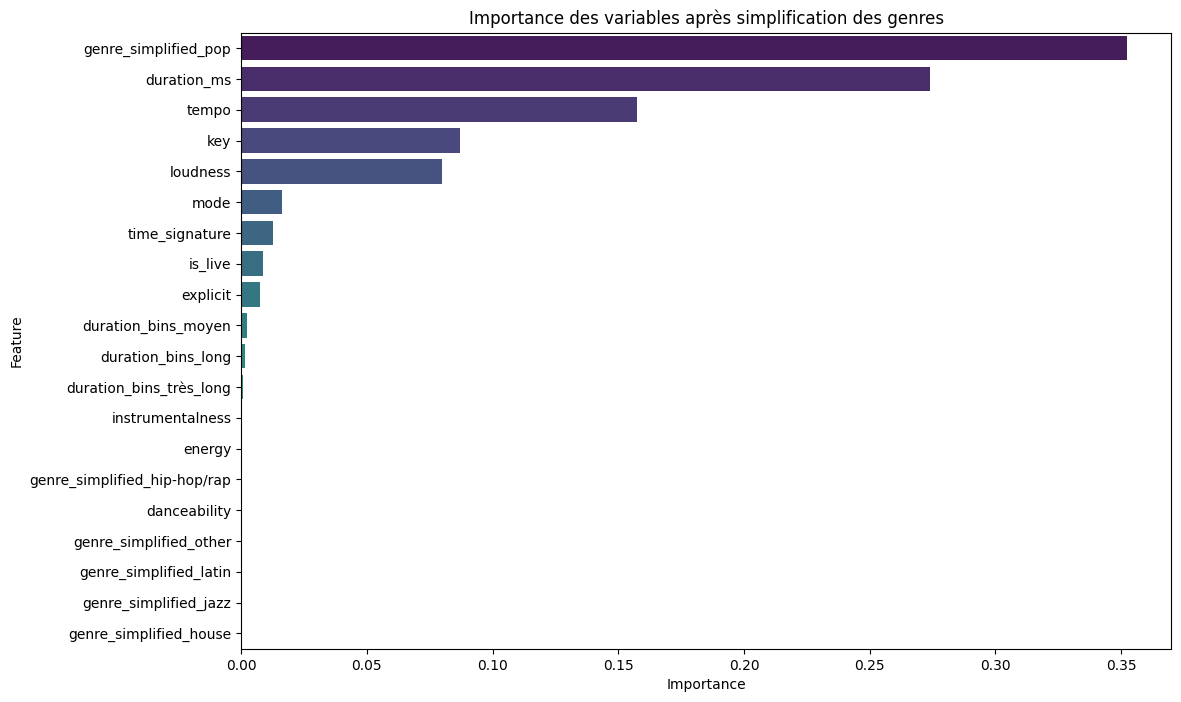

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Suppression des colonnes inutiles pour les features
features = Spotify_data_clean.drop(columns=[
    'popularity', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 
    'track_name', 'duration_bins'
], errors='ignore')

target = Spotify_data_clean['popularity']

# 2. Conversion des booléens en int pour le modèle
features = features.astype(int)

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 4. Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# 5. Prédiction et évaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle après simplification des genres et nouvelles variables :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

# 6. Importance des variables
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")
plt.title("Importance des variables après simplification des genres")
plt.show()


Performance du modèle XGBoost :
RMSE : 16.36
R² : 0.47


C:\Users\kheir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kheir\AppData\Local\Temp\ipykernel_16312\99563124.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette="viridis")


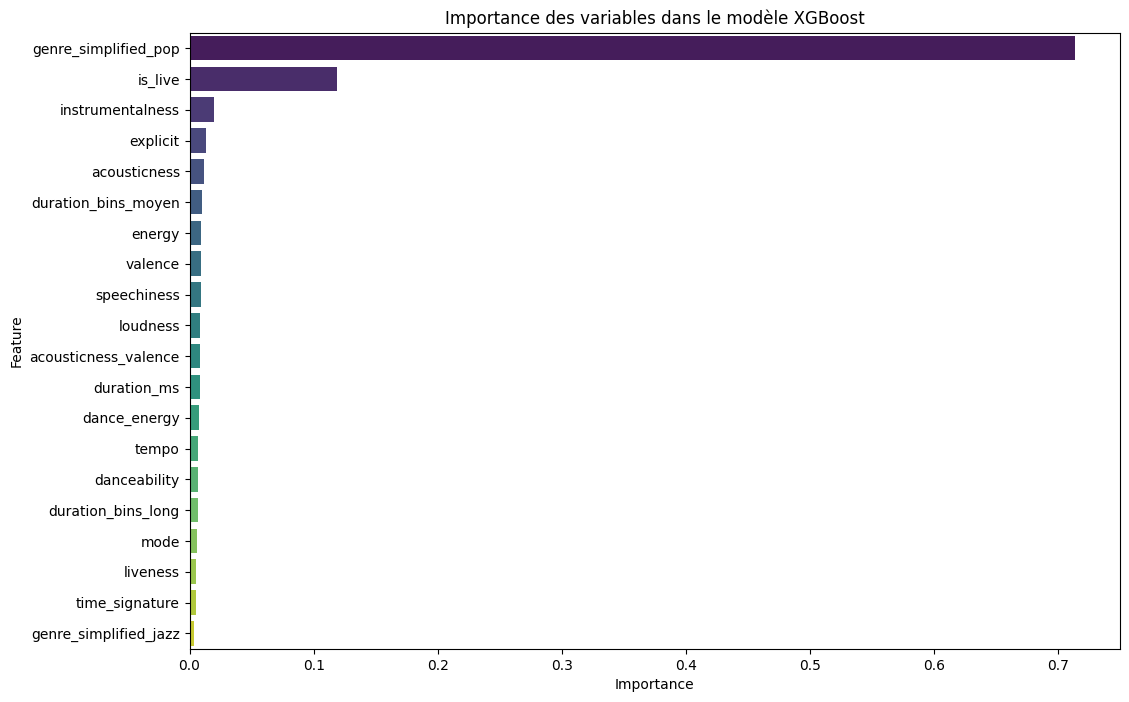

In [155]:
# Importation des librairies nécessaires
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sélection des features et de la target
features = Spotify_data_clean.drop(columns=[
    'popularity', 'Unnamed: 0', 'track_id', 'artists', 
    'album_name', 'track_name', 'duration_bins'
], errors='ignore')
target = Spotify_data_clean['popularity']

# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 3. Initialisation et entraînement du modèle XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=150, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 4. Prédiction et évaluation
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle XGBoost :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

# 5. Importance des variables
importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 6. Visualisation de l'importance des variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette="viridis")
plt.title("Importance des variables dans le modèle XGBoost")
plt.show()


In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Sélection des features et de la target
features = Spotify_data_clean.drop(columns=[
    'popularity', 'Unnamed: 0', 'track_id', 'artists', 
    'album_name', 'track_name', 'duration_bins'
], errors='ignore')
target = Spotify_data_clean['popularity']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV pour la recherche des meilleurs paramètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Entraînement du GridSearch
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Évaluation du modèle optimisé
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle Random Forest optimisé :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prédiction sur l'ensemble de test
y_pred = best_rf.predict(X_test)

# Calcul des résidus
residuals = y_test - y_pred

# Scatter plot des résidus
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Visualisation des résidus")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
plt.show()

# Distribution des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Conversion des colonnes booléennes en int
for col in Spotify_data_clean.select_dtypes(include='bool').columns:
    Spotify_data_clean[col] = Spotify_data_clean[col].astype(int)

# 2. Identifier et supprimer les colonnes non numériques restantes
non_numeric_cols = Spotify_data_clean.select_dtypes(include=['object']).columns
print("Colonnes non numériques supprimées :", non_numeric_cols)

Spotify_data_clean = Spotify_data_clean.drop(columns=non_numeric_cols)

# 3. Transformation logarithmique de la cible
Spotify_data_clean['popularity_log'] = np.log1p(Spotify_data_clean['popularity'])

# 4. Sélection des features et de la nouvelle cible
features = Spotify_data_clean.drop(columns=['popularity', 'popularity_log'], errors='ignore')
target_log = Spotify_data_clean['popularity_log']

# 1. Vérification des colonnes non numériques
print("Colonnes non numériques avant encodage :", features.select_dtypes(include=['object']).columns)

# 2. One-Hot Encoding pour 'duration_bins' si elle existe
features = pd.get_dummies(features, columns=['duration_bins'], drop_first=True)

# 3. Vérification des types de données après encodage
print("Colonnes restantes après encodage :", features.dtypes)


# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

# 6. Entraînement du modèle Random Forest optimisé
best_rf = RandomForestRegressor(
    n_estimators=200, max_depth=None, max_features='sqrt',
    min_samples_leaf=1, min_samples_split=2, random_state=42
)
best_rf.fit(X_train, y_train)

# 7. Prédiction et réinversion de la transformation logarithmique
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log1p pour revenir à l'échelle originale
y_test_original = np.expm1(y_test)

# 8. Évaluation des performances
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"Performance du modèle après transformation logarithmique :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

# 9. Visualisation des résidus après transformation
residuals = y_test_original - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Visualisation des résidus après transformation logarithmique")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution des résidus après transformation logarithmique")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Définir le seuil de segmentation
seuil_popularite = 50

# Segmenter les données
low_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] <= seuil_popularite]
high_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] > seuil_popularite]

print(f"Nombre de morceaux à faible popularité : {len(low_popularity)}")
print(f"Nombre de morceaux à forte popularité : {len(high_popularity)}")

def train_evaluate_rf(data, segment_name):
    # Créer une copie des données pour éviter les modifications involontaires
    data = data.copy()

    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle
    rf = RandomForestRegressor(
        n_estimators=200, max_depth=None, max_features='sqrt',
        min_samples_leaf=1, min_samples_split=2, random_state=42
    )
    rf.fit(X_train, y_train)

    # Prédiction et réinversion de la transformation logarithmique
    y_pred_log = rf.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle pour {segment_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return rf




In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 1. Définir le seuil de segmentation
seuil_popularite = 50

# Segmenter les données
low_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] <= seuil_popularite].copy()
high_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] > seuil_popularite].copy()

print(f"Nombre de morceaux à faible popularité : {len(low_popularity)}")
print(f"Nombre de morceaux à forte popularité : {len(high_popularity)}")

# Fonction pour entraîner et évaluer un modèle Random Forest
def train_evaluate_rf(data, segment_name):
    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle
    rf = RandomForestRegressor(
        n_estimators=200, max_depth=None, max_features='sqrt',
        min_samples_leaf=1, min_samples_split=2, random_state=42
    )
    rf.fit(X_train, y_train)

    # Prédiction et réinversion de la transformation logarithmique
    y_pred_log = rf.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle pour {segment_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return rf

# 2. Entraîner et évaluer les deux modèles
print("**Modèle pour les morceaux à faible popularité**")
model_low = train_evaluate_rf(low_popularity, "faible popularité")

print("\n**Modèle pour les morceaux à forte popularité**")
model_high = train_evaluate_rf(high_popularity, "forte popularité")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour visualiser les résidus
def plot_residuals(model, X_test, y_test, segment_name):
    # Prédiction des valeurs
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Inversion de la transformation logarithmique
    y_test_original = np.expm1(y_test)

    # Calcul des résidus
    residuals = y_test_original - y_pred

    # Scatter plot des résidus
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Visualisation des résidus pour {segment_name}")
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
    plt.show()

    # Distribution des résidus
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"Distribution des résidus pour {segment_name}")
    plt.xlabel("Résidus")
    plt.ylabel("Fréquence")
    plt.show()

# Visualisation des résidus pour faible popularité
X_low = low_popularity.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                     'artists', 'album_name', 'track_name'], errors='ignore')
X_low = pd.get_dummies(X_low, drop_first=True)
y_low = np.log1p(low_popularity['popularity'])
plot_residuals(model_low, X_low, y_low, "faible popularité")

# Visualisation des résidus pour forte popularité
X_high = high_popularity.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                       'artists', 'album_name', 'track_name'], errors='ignore')
X_high = pd.get_dummies(X_high, drop_first=True)
y_high = np.log1p(high_popularity['popularity'])
plot_residuals(model_high, X_high, y_high, "forte popularité")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def train_evaluate_gb(data, segment_name):
    # Créer une copie des données pour éviter les modifications
    data = data.copy()

    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle Gradient Boosting
    gb = GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
    )
    gb.fit(X_train, y_train)

    # Prédiction et réinversion de la transformation logarithmique
    y_pred_log = gb.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle Gradient Boosting pour {segment_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return gb

# Entraîner le modèle Gradient Boosting pour faible popularité
print("**Modèle Gradient Boosting pour les morceaux à faible popularité**")
gb_model_low = train_evaluate_gb(low_popularity, "faible popularité")


In [ ]:
# 1. Recalcul des prédictions pour faible popularité
X_low = low_popularity.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                     'artists', 'album_name', 'track_name'], errors='ignore')

# Encodage des variables catégorielles pour correspondre au modèle entraîné
X_low_encoded = pd.get_dummies(X_low, drop_first=True)

# Assurer que seules les colonnes utilisées lors de l'entraînement sont présentes
X_low_encoded = X_low_encoded.reindex(columns=gb_model_low.feature_names_in_, fill_value=0)

# Transformation de la cible
y_low = np.log1p(low_popularity['popularity'])

# Prédiction
y_pred_log = gb_model_low.predict(X_low_encoded)
y_pred = np.expm1(y_pred_log)  # Retour à l'échelle originale
y_test_original = np.expm1(y_low)

# Calcul des résidus
residuals = y_test_original - y_pred

# 2. Création d'une nouvelle dataframe pour l'analyse
low_popularity_analysis = X_low_encoded.copy()
low_popularity_analysis['residuals'] = residuals

# 3. Visualisation des résidus en fonction des principales variables
import seaborn as sns
import matplotlib.pyplot as plt

variables_to_plot = ['duration_ms', 'energy', 'loudness', 'danceability']

for var in variables_to_plot:
    if var in low_popularity_analysis.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=low_popularity_analysis[var], y=low_popularity_analysis['residuals'], alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Résidus en fonction de {var} (Faible Popularité)")
        plt.xlabel(var)
        plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
        plt.show()

# 4. Corrélation des résidus avec les autres variables
correlations = low_popularity_analysis.corr()['residuals'].sort_values(ascending=False)
print("\nCorrélation des résidus avec les autres variables :")
print(correlations)


In [ ]:
# Transformation logarithmique pour réduire l'impact des outliers
Spotify_data_clean['duration_ms_log'] = np.log1p(Spotify_data_clean['duration_ms'])
Spotify_data_clean['loudness_log'] = np.log1p(Spotify_data_clean['loudness'].abs())  # Valeurs négatives

# Création de nouvelles features basées sur les interactions
Spotify_data_clean['loudness_duration'] = Spotify_data_clean['loudness'] * Spotify_data_clean['duration_ms']
Spotify_data_clean['dance_energy'] = Spotify_data_clean['danceability'] * Spotify_data_clean['energy']

# Vérification des nouvelles colonnes ajoutées
print(Spotify_data_clean[['duration_ms_log', 'loudness_log', 'loudness_duration', 'dance_energy']].head())


In [ ]:
# Séparer les données pour les genres 'pop' et 'rock'
pop_data = Spotify_data_clean[Spotify_data_clean['genre_simplified_pop'] == 1]
rock_data = Spotify_data_clean[Spotify_data_clean['genre_simplified_rock'] == 1]

def train_evaluate_segmented(data, genre_name):
    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])
    
    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle Random Forest
    rf = RandomForestRegressor(n_estimators=200, max_depth=None, max_features='sqrt', random_state=42)
    rf.fit(X_train, y_train)

    # Prédiction et réinversion
    y_pred_log = rf.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle pour le genre {genre_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return rf

# Entraîner des modèles pour les genres spécifiques
print("**Modèle pour le genre Pop**")
rf_model_pop = train_evaluate_segmented(pop_data, "Pop")

print("\n**Modèle pour le genre Rock**")
rf_model_rock = train_evaluate_segmented(rock_data, "Rock")


In [ ]:
# Fonction pour visualiser les résidus
def plot_residuals(model, data, genre_name):
    # Préparation des données
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    features = pd.get_dummies(features, drop_first=True).reindex(columns=model.feature_names_in_, fill_value=0)
    target_log = np.log1p(data['popularity'])

    # Prédiction
    y_pred_log = model.predict(features)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(target_log)

    # Calcul des résidus
    residuals = y_test_original - y_pred

    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Visualisation des résidus pour le genre {genre_name}")
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
    plt.show()

# Visualisation pour les genres "pop" et "rock"
plot_residuals(rf_model_pop, pop_data, "Pop")
plot_residuals(rf_model_rock, rock_data, "Rock")



In [ ]:
from xgboost import XGBRegressor

def train_evaluate_xgboost(data, genre_name):
    data = data.copy()

    # Transformation logarithmique
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle XGBoost
    xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    xgb.fit(X_train, y_train)

    # Prédiction et évaluation
    y_pred_log = xgb.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle XGBoost pour le genre {genre_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")

    return xgb

# Entraîner XGBoost pour le genre Pop
print("**Modèle XGBoost pour le genre Pop**")
xgb_model_pop = train_evaluate_xgboost(pop_data, "Pop")


In [ ]:
# Taille des données pour le genre Rock
print(f"Nombre de morceaux dans le genre Rock : {len(rock_data)}")

# Vérification des valeurs uniques pour certaines colonnes
print("\nValeurs uniques dans les principales variables pour le genre Rock :")
print(rock_data[['duration_ms', 'loudness', 'energy']].nunique())


In [ ]:
from sklearn.utils import class_weight

# Ajouter une colonne pour les genres principaux
Spotify_data_clean['main_genre'] = Spotify_data_clean[['genre_simplified_pop', 
                                                       'genre_simplified_rock', 
                                                       'genre_simplified_other']].idxmax(axis=1)

# Calcul des poids des classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Spotify_data_clean['main_genre']),
    y=Spotify_data_clean['main_genre']
)

genre_weights = dict(zip(np.unique(Spotify_data_clean['main_genre']), class_weights))
print("Poids des genres :", genre_weights)

# Exemple d'intégration des poids dans un modèle Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_weighted = RandomForestRegressor(
    n_estimators=200, max_depth=None, random_state=42
)

# Pondérer l'échantillonnage
Spotify_data_clean['weight'] = Spotify_data_clean['main_genre'].map(genre_weights)

# Entraîner le modèle avec pondération
X = Spotify_data_clean.drop(columns=['popularity', 'weight', 'main_genre'], errors='ignore')
y = Spotify_data_clean['popularity']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
sample_weights = Spotify_data_clean['weight'].reindex(X_train.index)
rf_weighted.fit(X_train, y_train, sample_weight=sample_weights)


# Prédiction
y_pred = rf_weighted.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nPerformance du modèle global pondéré :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")
